**Step** **1**

تجهيز مكتبة الوقت،لقياس وقت التنفيذ


In [10]:
# استيراد المكتبات اللازمة
import time
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# إعدادات للرسومات البيانية
sns.set(style="whitegrid")

# **Step** **2**


كتابة الخورزميات

Selection Sort

---

هذه الخوارزمية تبحث عن أصغر عنصر في الجزء غير المرتب من المصفوفة، ثم تبدله مع العنصر الأول في هذا الجزء.

In [11]:
def selection_sort(arr):
    comparisons = 0
    moves = 0
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i + 1, n):
            comparisons += 1
            if arr[j] < arr[min_index]:
                min_index = j
        if min_index != i:
            arr[i], arr[min_index] = arr[min_index], arr[i]
            moves += 1
    return comparisons, moves

Bubble Sort
---
تقوم خوارزمية الفقاعات بمقارنة كل عنصر مع العنصر المجاور له، وتبدل العناصر إذا كانت في ترتيب خاطئ، وتكرر هذه العملية حتى يتم ترتيب المصفوفة.




In [12]:
def bubble_sort(arr):
    comparisons = 0
    moves = 0
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            comparisons += 1
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                moves += 1
    return comparisons, moves

خوارزمية ترتيب الإدراج (باستخدام التبديل)
---

شرح: في هذه الطريقة، يتم إدخال كل عنصر في موقعه المناسب عن طريق التبديل مع العناصر الأكبر منه حتى يجد مكانه المناسب.





In [13]:
def insertion_sort_exchange(arr):
    comparisons = 0
    moves = 0
    n = len(arr)
    for i in range(1, n):
        j = i
        while j > 0 and arr[j] < arr[j - 1]:
            comparisons += 1
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            moves += 1
            j -= 1
        comparisons += 1
    return comparisons, moves

خوارزمية ترتيب الإدراج (باستخدام الإزاحة)


---

شرح: في هذه الطريقة، يتم إزاحة العناصر الأكبر لإنشاء فراغ للعناصر الجديدة مباشرة، دون تبديل متكرر.


In [14]:
def insertion_sort_shift(arr):
    comparisons = 0
    moves = 0
    n = len(arr)
    for i in range(1, n):
        current = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > current:
            comparisons += 1
            arr[j + 1] = arr[j]
            moves += 1
            j -= 1
        arr[j + 1] = current
        moves += 1  # لتسجيل حركة التثبيت النهائية
    return comparisons, moves

**Step** **3**

إعداد بيانات الاختبار

---

دوال لتوليد المصفوفات بأحجام مختلفة وفي حالات ترتيب مختلفة (عشوائية، مرتبة تصاعدياً، مرتبة تنازلياً).



In [15]:
def generate_data(size, order='random'):
    if order == 'random':
        return [random.randint(1, size) for _ in range(size)]
    elif order == 'ascending':
        return list(range(1, size + 1))
    elif order == 'descending':
        return list(range(size, 0, -1))

## **Step** **4** **bold text**

تنفيذ الخوارزميات على بيانات الاختبار ونقيس الوقت المستغرق

In [16]:
def test_sorting_algorithm(algorithm, arr):
    start_time = time.time()
    comparisons, moves = algorithm(arr[:])  # تمرير نسخة من المصفوفة
    end_time = time.time()
    cpu_time = end_time - start_time
    return comparisons, moves, cpu_time

**Step** **5**

تنفيذ 30 تجربة لكل خوارزمية



In [17]:
def run_experiments():
    sizes = [1, 10, 20]
    orders = ['random', 'ascending', 'descending']
    algorithms = {
        "Selection Sort": selection_sort,
        "Bubble Sort": bubble_sort,
        "Insertion Sort (Exchange)": insertion_sort_exchange,
        "Insertion Sort (Shift)": insertion_sort_shift
    }

    data = []
    for algorithm_name, algorithm in algorithms.items():
        for size in sizes:
            for order in orders:
                comparisons, moves, cpu_time = 0, 0, 0
                for _ in range(30):
                    arr = generate_data(size, order)
                    comp, mv, time_taken = test_sorting_algorithm(algorithm, arr)
                    comparisons += comp
                    moves += mv
                    cpu_time += time_taken
                data.append({
                    'Algorithm': algorithm_name,
                    'Array Size': size,
                    'Order': order,
                    'Avg Comparisons': comparisons / 30,
                    'Avg Moves': moves / 30,
                    'Avg CPU Time': cpu_time / 30
                })
    return pd.DataFrame(data)

**Step** **6**

التحليل  وعرض النتائج في جدول واستخدام الرسوم البيانية




                    Algorithm  Array Size       Order  Avg Comparisons  \
0              Selection Sort           1      random         0.000000   
1              Selection Sort           1   ascending         0.000000   
2              Selection Sort           1  descending         0.000000   
3              Selection Sort          10      random        45.000000   
4              Selection Sort          10   ascending        45.000000   
5              Selection Sort          10  descending        45.000000   
6              Selection Sort          20      random       190.000000   
7              Selection Sort          20   ascending       190.000000   
8              Selection Sort          20  descending       190.000000   
9                 Bubble Sort           1      random         0.000000   
10                Bubble Sort           1   ascending         0.000000   
11                Bubble Sort           1  descending         0.000000   
12                Bubble Sort         

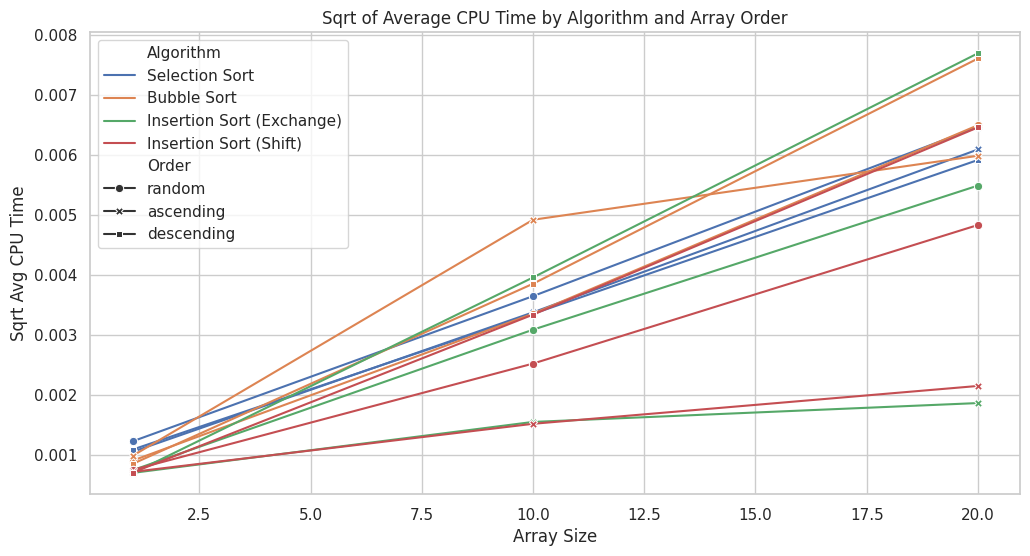

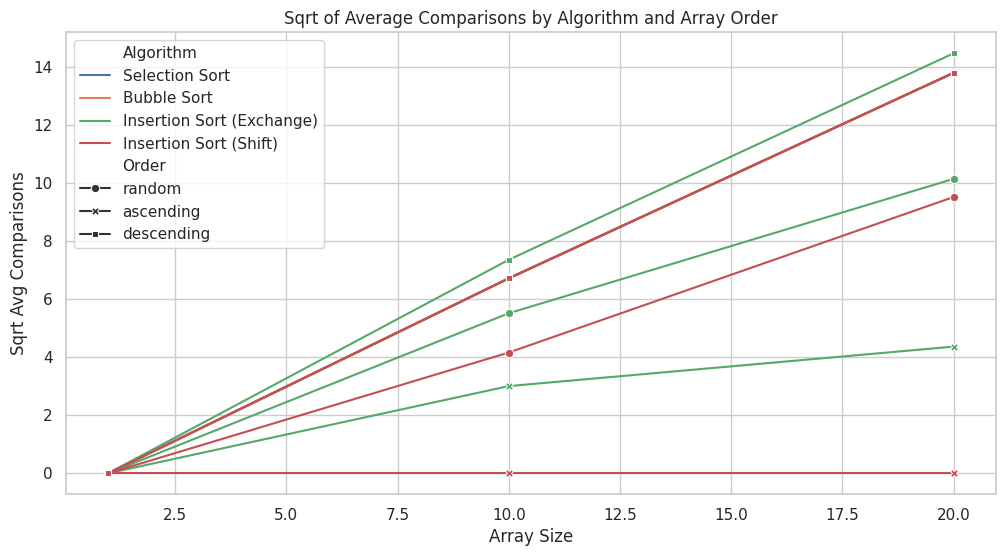

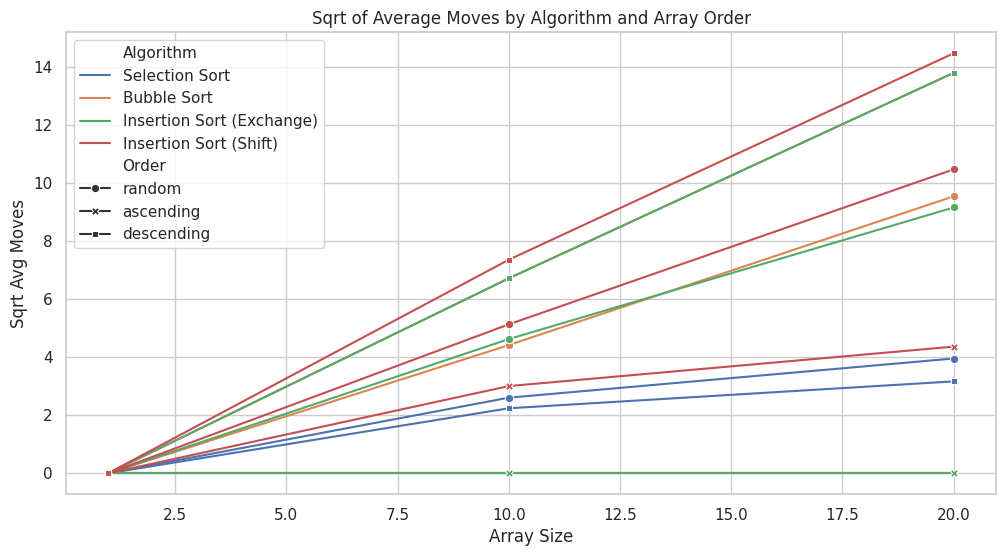

In [18]:
# تشغيل التجارب وحفظ النتائج
df_results = run_experiments()

# عرض النتائج في شكل جدول
print(df_results)

# تطبيق الجذر التربيعي على المقاييس لتسهيل الفهم والمقارنة
df_results['Sqrt Avg CPU Time'] = df_results['Avg CPU Time'].apply(lambda x: x**0.5)
df_results['Sqrt Avg Comparisons'] = df_results['Avg Comparisons'].apply(lambda x: x**0.5)
df_results['Sqrt Avg Moves'] = df_results['Avg Moves'].apply(lambda x: x**0.5)

# رسم منحنيات بيانية لوقت التنفيذ لكل خوارزمية حسب ترتيب المصفوفة
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_results, x='Array Size', y='Sqrt Avg CPU Time', hue='Algorithm', style='Order', markers=True, dashes=False)
plt.title('Sqrt of Average CPU Time by Algorithm and Array Order')
plt.xlabel('Array Size')
plt.ylabel('Sqrt Avg CPU Time')
plt.grid(True)
plt.show()

# رسم منحنيات بيانية للمقارنات لكل خوارزمية حسب ترتيب المصفوفة
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_results, x='Array Size', y='Sqrt Avg Comparisons', hue='Algorithm', style='Order', markers=True, dashes=False)
plt.title('Sqrt of Average Comparisons by Algorithm and Array Order')
plt.xlabel('Array Size')
plt.ylabel('Sqrt Avg Comparisons')
plt.grid(True)
plt.show()

# رسم منحنيات بيانية للحركات لكل خوارزمية حسب ترتيب المصفوفة
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_results, x='Array Size', y='Sqrt Avg Moves', hue='Algorithm', style='Order', markers=True, dashes=False)
plt.title('Sqrt of Average Moves by Algorithm and Array Order')
plt.xlabel('Array Size')
plt.ylabel('Sqrt Avg Moves')
plt.grid(True)
plt.show()